In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive"
%cd "פרוייקט גמר מערכות מידע"

/content/drive/My Drive
[Errno 2] No such file or directory: 'פרוייקט גמר מערכות מידע'
/content/drive/My Drive


In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt




In [ ]:
shops_data = pd.read_csv("store_mapping.csv")
ping_data=pd.read_csv("ping_info.csv")


In [ ]:
def modify_floor(s):
  return s[-1] if s.startswith('F') else 0


ping_data['floor']= ping_data['floor'].apply(modify_floor)
ping_data['floor']


0         4
1         1
2         4
3         0
4         2
         ..
107630    4
107631    4
107632    2
107633    1
107634    0
Name: floor, Length: 107635, dtype: object

In [ ]:
indices = [0]

i = 0
for index, row in shops_data.iterrows():
  if row['Floor_Index'] == i:
    continue
  else:
    i += 1
    indices.append(index+1)

indices.append(shops_data.shape[0]+1)



indices




[0, 49, 86, 120, 153, 161, 164, 165, 166, 167]

In [ ]:
ping_data.head()

,Shopper_ID,floor,lat,lng,x,y,seenTimestamp
0,Shopper_556,4,37.661463,-122.298673,-2934.558251,-16169.722290,2016-11-22T02:16:06.000Z
1,Shopper_556,1,37.784062,-122.406943,117.262475,151.823812,2016-12-23T22:01:25.000Z
2,Shopper_556,4,37.784361,-122.406710,156.125087,171.357200,2016-11-22T01:42:28.000Z
3,Shopper_360,0,37.784341,-122.406891,134.499673,167.674401,2016-10-13T18:27:38.000Z
4,Shopper_360,2,37.784017,-122.407307,94.981693,172.269243,2016-10-12T21:36:18.000Z


In [ ]:
dist = lambda p1,p2:math.sqrt( (p1[0]-p2[0])**2+(p1[1]-p2[1])**2 )

def min_distance_shop(shopper,shop_list):
  p1 = [shopper['lat'],shopper['lng']]
  
  min_dist = math.inf
  min_shop = None

  for i,k in shop_list.iterrows():
 
    p2 = [k['latitude'],k['longitude']]
  
    dis = dist(p1,p2)

    if dis < min_dist:
      min_dist = dis
      min_shop = k['Store_Name']

  
  return min_shop


In [ ]:
shops = []
for index, row in ping_data.iterrows():

  f = int(row['floor'])
  shops.append(min_distance_shop(row,shops_data.loc[indices[f]-1:indices[f+1]]))
  if index%1000==0: print(index/1000)

shops[0:5]
 


0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0


["Bloomingdale's",
 'Sunglass Hut',
 'TAP 415',
 'Marbles: The Brain Store',
 'Forever Flawless ']

In [ ]:
ping_data['predicted_shop'] = shops
ping_data.to_csv('out.csv')



In [ ]:
new_data = pd.read_csv("out.csv")

In [ ]:
from google.colab import files
files.download('out.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
shopping_data = pd.read_csv("shopping_data.csv")

In [ ]:
shops_data = pd.read_csv("store_mapping.csv")
ping_data=pd.read_csv("ping_info.csv")
category_mapping = pd.read_csv("category_mapping.csv")
demographic = pd.read_csv("domografic.csv")

In [ ]:
data_without_dup = new_data

In [ ]:
data_without_dup.shape

(107635, 9)

In [ ]:
data_without_dup = new_data.drop_duplicates(['Shopper_ID','seenTimestamp'],keep = 'first',inplace= False)


In [ ]:
data_without_dup.shape

(80923, 9)

In [ ]:
new_data=data_without_dup

In [ ]:
data_without_dup.to_csv('new_data.csv')

In [ ]:
data_without_dup = pd.read_csv("new_data.csv")

In [ ]:
from google.colab import files
files.download('new_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_without_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80923 entries, 0 to 80922
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      80923 non-null  int64  
 1   Unnamed: 0.1    80923 non-null  int64  
 2   Shopper_ID      80923 non-null  object 
 3   floor           80923 non-null  int64  
 4   lat             80923 non-null  float64
 5   lng             80923 non-null  float64
 6   x               80923 non-null  float64
 7   y               80923 non-null  float64
 8   seenTimestamp   80923 non-null  object 
 9   predicted_shop  80923 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 6.2+ MB


In [ ]:
data_without_dup.drop(['Unnamed: 0','Unnamed: 0.1'],  axis=1, inplace= True)
data_without_dup.head()

,Shopper_ID,floor,lat,lng,x,y,seenTimestamp,predicted_shop
0,Shopper_556,4,37.661463,-122.298673,-2934.558251,-16169.722290,2016-11-22T02:16:06.000Z,Bloomingdale's
1,Shopper_556,1,37.784062,-122.406943,117.262475,151.823812,2016-12-23T22:01:25.000Z,Sunglass Hut
2,Shopper_556,4,37.784361,-122.406710,156.125087,171.357200,2016-11-22T01:42:28.000Z,TAP 415
3,Shopper_360,0,37.784341,-122.406891,134.499673,167.674401,2016-10-13T18:27:38.000Z,Marbles: The Brain Store
4,Shopper_360,2,37.784017,-122.407307,94.981693,172.269243,2016-10-12T21:36:18.000Z,Forever Flawless


In [ ]:
###לבדוק למה מופיע פעמיים שורות 20-22 למעלה אותו קוד בדיוק
from google.colab import files
files.download('new_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_data.rename(columns= {'predicted_shop': 'Store_Name'}, inplace= True)
new_data.head()

,Unnamed: 0,Shopper_ID,floor,lat,lng,x,y,seenTimestamp,Store_Name
0,0,Shopper_556,4,37.661463,-122.298673,-2934.558251,-16169.722290,2016-11-22T02:16:06.000Z,Bloomingdale's
1,1,Shopper_556,1,37.784062,-122.406943,117.262475,151.823812,2016-12-23T22:01:25.000Z,Sunglass Hut
2,2,Shopper_556,4,37.784361,-122.406710,156.125087,171.357200,2016-11-22T01:42:28.000Z,TAP 415
3,3,Shopper_360,0,37.784341,-122.406891,134.499673,167.674401,2016-10-13T18:27:38.000Z,Marbles: The Brain Store
4,4,Shopper_360,2,37.784017,-122.407307,94.981693,172.269243,2016-10-12T21:36:18.000Z,Forever Flawless


In [ ]:
merge_df = pd.merge(left = new_data, right =category_mapping, how = 'inner')
merge_df.tail(30)

,Unnamed: 0,Shopper_ID,floor,lat,lng,x,y,seenTimestamp,Store_Name,Broad_Category,Fine_Category
80893,24898,Shopper_551,2,37.784497,-122.406035,212.053942,131.919301,2017-01-30T21:57:04.000Z,BCBGMAXAZRIA,Retail,Apparel And Accessories
80894,38203,Shopper_34,2,37.784531,-122.406059,213.165375,136.188470,2016-12-23T19:44:58.000Z,BCBGMAXAZRIA,Retail,Apparel And Accessories
80895,44393,Shopper_353,2,37.784490,-122.406133,205.295798,137.443914,2017-05-12T01:36:27.000Z,BCBGMAXAZRIA,Retail,Apparel And Accessories
80896,54234,Shopper_34,2,37.784531,-122.406059,213.165375,136.188470,2016-12-23T21:01:38.000Z,BCBGMAXAZRIA,Retail,Apparel And Accessories
80897,73890,Shopper_353,2,37.784497,-122.406035,212.053942,131.919301,2017-05-12T01:35:06.000Z,BCBGMAXAZRIA,Retail,Apparel And Accessories
80898,92508,Shopper_284,2,37.784700,-122.405981,231.219351,144.777749,2017-01-12T02:19:46.000Z,BCBGMAXAZRIA,Retail,Apparel And Accessories
80899,97463,Shopper_542,2,37.784520,-122.406096,210.075801,137.563985,2017-01-10T00:27:52.000Z,BCBGMAXAZRIA,Retail,Apparel And Accessories
80900,26402,Shopper_24,3,37.784217,-122.406094,188.465643,111.085443,2017-01-13T02:18:26.000Z,Banana Republic,Retail,Apparel And Accessories
80901,26532,Shopper_348,0,37.784572,-122.406219,194.564918,144.662014,2016-12-31T03:16:17.000Z,Coriander Gourmet Thai,Dining,Qsr Restaurants
80902,34636,Shopper_269,0,37.784835,-122.406163,218.564199,162.051053,2017-04-25T19:24:42.000Z,Coriander Gourmet Thai,Dining,Qsr Restaurants


In [ ]:
#איחוד טבלאות לצורך בדיקת מבחן T - לצורך מצגת אמצע
demographic = demographic.rename(columns={'Shopper_Id': 'Shopper_ID'})
inner_join =pd.merge(new_data, demographic,on = 'Shopper_ID', how='inner')


inner_join.drop(columns=['Gender', 'Marital_Status','Owns_Home','Number_of_Children_under_18_years_of_age'])



,Unnamed: 0,Shopper_ID,floor,lat,lng,x,y,seenTimestamp,Store_Name,ID,Age
0,0,Shopper_556,4,37.661463,-122.298673,-2934.558251,-1.616972e+04,2016-11-22T02:16:06.000Z,Bloomingdale's,0998e032-56c2-3579-8518-5f9260d17dec,45
1,1,Shopper_556,1,37.784062,-122.406943,117.262475,1.518238e+02,2016-12-23T22:01:25.000Z,Sunglass Hut,0998e032-56c2-3579-8518-5f9260d17dec,45
2,2,Shopper_556,4,37.784361,-122.406710,156.125087,1.713572e+02,2016-11-22T01:42:28.000Z,TAP 415,0998e032-56c2-3579-8518-5f9260d17dec,45
3,868,Shopper_556,0,37.784081,-122.406485,139.629680,1.220553e+02,2016-12-17T23:35:41.000Z,Bristol Farms,0998e032-56c2-3579-8518-5f9260d17dec,45
4,1624,Shopper_556,4,37.784361,-122.406710,156.125087,1.713572e+02,2016-11-22T01:43:58.000Z,TAP 415,0998e032-56c2-3579-8518-5f9260d17dec,45
...,...,...,...,...,...,...,...,...,...,...,...
80918,103261,Shopper_523,3,32.386359,-104.920359,661979.463500,-1.510038e+06,2016-10-09T23:09:40.000Z,Bloomingdale's,fc81fa97-7f10-3b69-bd59-7c55a3f1acf2,40
80919,103962,Shopper_523,0,34.498529,-111.762872,410989.756700,-9.155476e+05,2016-10-09T22:53:50.000Z,Bloomingdale's,fc81fa97-7f10-3b69-bd59-7c55a3f1acf2,40
80920,104295,Shopper_523,1,37.784142,-122.406977,121.408225,1.602619e+02,2016-10-09T23:05:31.000Z,Sunglass Hut,fc81fa97-7f10-3b69-bd59-7c55a3f1acf2,40
80921,104296,Shopper_523,3,37.784176,-122.406847,138.462442,1.545816e+02,2016-11-27T23:33:01.000Z,Lids,fc81fa97-7f10-3b69-bd59-7c55a3f1acf2,40


In [ ]:
#איחוד טבלאות לצורך בדיקת מבחן T - לצורך מצגת אמצע
new_data = new_data.rename(columns={'predicted_shop': 'Store_Name'})
inner_join2 =pd.merge(inner_join, category_mapping,on = 'Store_Name', how='inner')
inner_join2


,Unnamed: 0,Shopper_ID,floor,lat,lng,x,y,seenTimestamp,Store_Name,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,Broad_Category,Fine_Category
0,0,Shopper_556,4,37.661463,-122.298673,-2934.558251,-1.616972e+04,2016-11-22T02:16:06.000Z,Bloomingdale's,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Retail,Department Stores
1,2510,Shopper_556,0,37.768880,-122.393286,-217.562511,-1.895357e+03,2016-12-23T21:47:25.000Z,Bloomingdale's,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Retail,Department Stores
2,3246,Shopper_556,4,37.750962,-122.377009,-662.854944,-4.290871e+03,2016-12-23T21:45:46.000Z,Bloomingdale's,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Retail,Department Stores
3,7456,Shopper_556,3,33.969097,-110.133484,462588.840200,-1.061896e+06,2017-06-10T01:18:26.000Z,Bloomingdale's,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Retail,Department Stores
4,11015,Shopper_556,4,37.738243,-122.366040,-995.787685,-5.968775e+03,2017-06-10T01:44:26.000Z,Bloomingdale's,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Retail,Department Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80918,36175,Shopper_220,3,37.784387,-122.406632,168.428929,1.578560e+02,2016-10-21T22:16:39.000Z,Godiva Chocolatier,7c61594a-b211-3275-8737-a8af425e78fe,56,M,M,Y,0,Dining,Qsr Restaurants
80919,31286,Shopper_171,3,37.784382,-122.406703,163.612988,1.618801e+02,2017-02-04T03:40:49.000Z,Godiva Chocolatier,c276f559-5968-3102-a20c-40dda5a46eaa,57,M,M,Y,0,Dining,Qsr Restaurants
80920,8003,Shopper_107,3,37.784162,-122.406305,171.005530,1.198154e+02,2016-10-06T23:34:55.000Z,Vera Bradley,bd1cc75d-2fde-32b5-8841-c0083d2c6524,42,F,M,N,1,Retail,Apparel And Accessories
80921,89372,Shopper_228,2,37.784312,-122.406118,192.390696,1.223960e+02,2017-05-14T01:49:07.000Z,J.Crew,d2924f44-e352-3b25-ab34-31df0e36c26e,35,F,S,Y,0,Retail,Apparel And Accessories


In [ ]:
#בדיקת קטגורית אקססוריס- לצורך מבחן T
df_filtered = inner_join2.loc[lambda x: x['Fine_Category'] == 'Apparel And Accessories']
df_filtered

,Unnamed: 0,Shopper_ID,floor,lat,lng,x,y,seenTimestamp,Store_Name,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,Broad_Category,Fine_Category
32138,1,Shopper_556,1,37.784062,-122.406943,117.262475,151.823812,2016-12-23T22:01:25.000Z,Sunglass Hut,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Retail,Apparel And Accessories
32139,25504,Shopper_556,1,37.784071,-122.406986,115.318422,155.158781,2016-12-23T21:53:46.000Z,Sunglass Hut,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Retail,Apparel And Accessories
32140,28389,Shopper_556,1,37.784062,-122.406943,117.262475,151.823812,2016-12-23T22:02:14.000Z,Sunglass Hut,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Retail,Apparel And Accessories
32141,50406,Shopper_556,1,37.784087,-122.406924,120.445983,152.644131,2016-12-23T21:57:46.000Z,Sunglass Hut,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Retail,Apparel And Accessories
32142,66207,Shopper_556,1,37.784087,-122.406924,120.445983,152.644131,2016-12-23T21:55:48.000Z,Sunglass Hut,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Retail,Apparel And Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80908,21563,Shopper_462,1,37.784676,-122.406538,190.468272,175.512778,2017-06-02T19:51:04.000Z,Tory Burch,1abc2658-d6d7-3182-b42d-425baa0b6248,25,F,S,N,0,Retail,Apparel And Accessories
80911,32386,Shopper_487,3,37.784592,-122.406365,201.042852,157.319921,2017-01-18T03:31:41.000Z,Lucky Brand Jeans,8633eb29-cb00-37aa-87c6-5c8555a65572,66,F,S,Y,0,Retail,Apparel And Accessories
80920,8003,Shopper_107,3,37.784162,-122.406305,171.005530,119.815442,2016-10-06T23:34:55.000Z,Vera Bradley,bd1cc75d-2fde-32b5-8841-c0083d2c6524,42,F,M,N,1,Retail,Apparel And Accessories
80921,89372,Shopper_228,2,37.784312,-122.406118,192.390696,122.396002,2017-05-14T01:49:07.000Z,J.Crew,d2924f44-e352-3b25-ab34-31df0e36c26e,35,F,S,Y,0,Retail,Apparel And Accessories


In [ ]:
#בדיקת קטגורית הנעלה- לצורך בדיקת מבחן T
df_filtered2 = inner_join2.loc[lambda x: x['Fine_Category'] == 'Shoe Stores']
df_filtered2

,Unnamed: 0,Shopper_ID,floor,lat,lng,x,y,seenTimestamp,Store_Name,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,Broad_Category,Fine_Category
46595,11411,Shopper_556,3,37.784403,-122.406342,187.634283,141.096333,2017-06-10T01:43:49.000Z,Clarks,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Retail,Shoe Stores
46596,31400,Shopper_477,3,37.784256,-122.406442,169.859889,135.753441,2016-12-01T03:05:41.000Z,Clarks,57a4df0e-0991-3bac-8a5c-fdfdc176c685,27,M,M,N,0,Retail,Shoe Stores
46597,14643,Shopper_433,3,37.784366,-122.406455,177.735549,145.204411,2017-01-22T00:09:04.000Z,Clarks,e526282b-d45e-3da5-98e9-4229a09d6bb4,65,M,S,Y,0,Retail,Shoe Stores
46598,54512,Shopper_53,3,37.784255,-122.406391,172.975189,132.434171,2017-06-08T23:02:49.000Z,Clarks,965511f2-c9e7-36f9-bf23-3b0d586b507a,47,M,S,N,0,Retail,Shoe Stores
46599,55978,Shopper_495,3,37.784363,-122.406355,183.659987,138.739854,2017-04-03T22:00:28.000Z,Clarks,6b3412e3-243c-3596-b9a9-a65abeca934b,44,M,M,N,0,Retail,Shoe Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80676,14947,Shopper_532,2,37.784338,-122.406427,175.082071,143.471604,2017-01-08T01:39:22.000Z,ECCO,8bca0a01-c300-3a4b-ab77-bd6fa887e152,60,M,S,N,0,Retail,Shoe Stores
80677,72117,Shopper_532,2,37.784316,-122.406431,173.150600,142.055580,2017-01-08T02:02:00.000Z,ECCO,8bca0a01-c300-3a4b-ab77-bd6fa887e152,60,M,S,N,0,Retail,Shoe Stores
80678,46536,Shopper_271,2,37.784289,-122.406531,164.761843,146.004183,2017-01-25T21:43:06.000Z,ECCO,a06fff51-cee8-3539-8c47-5f0757d9d0e4,45,F,S,N,0,Retail,Shoe Stores
80679,89024,Shopper_63,2,37.784257,-122.406564,160.201356,145.446336,2016-10-24T01:46:09.000Z,ECCO,fb449176-20e7-3748-a99d-2ccc6471a13c,53,F,M,Y,0,Retail,Shoe Stores


In [ ]:
import scipy  

In [ ]:
# מבחן T Test
scipy.stats.ttest_ind(df_filtered['Age'], df_filtered2['Age'], equal_var=False)



Ttest_indResult(statistic=-1.028167975633527, pvalue=0.30392067840209724)

In [ ]:
df_filtered3 = inner_join2.loc[lambda x: x['Fine_Category'] == 'Qsr Restaurants']
df_filtered3

,Unnamed: 0,Shopper_ID,floor,lat,lng,x,y,seenTimestamp,Store_Name,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,Broad_Category,Fine_Category
32630,2,Shopper_556,4,37.784361,-122.406710,156.125087,171.357200,2016-11-22T01:42:28.000Z,TAP 415,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Dining,Qsr Restaurants
32631,1624,Shopper_556,4,37.784361,-122.406710,156.125087,171.357200,2016-11-22T01:43:58.000Z,TAP 415,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Dining,Qsr Restaurants
32632,7868,Shopper_556,4,37.784361,-122.406710,156.125087,171.357200,2016-11-22T00:46:06.000Z,TAP 415,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Dining,Qsr Restaurants
32633,11547,Shopper_556,4,37.784361,-122.406710,156.125087,171.357200,2016-11-22T01:02:37.000Z,TAP 415,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Dining,Qsr Restaurants
32634,16529,Shopper_556,4,37.784282,-122.406802,144.112612,170.977268,2016-11-22T01:59:25.000Z,TAP 415,0998e032-56c2-3579-8518-5f9260d17dec,45,F,M,Y,4,Dining,Qsr Restaurants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80915,63783,Shopper_294,3,37.784369,-122.406664,164.974669,158.367081,2016-10-02T22:54:52.000Z,Godiva Chocolatier,8ba2d501-230a-30e3-b860-8da0e55df28c,48,M,M,N,0,Dining,Qsr Restaurants
80916,3248,Shopper_414,3,37.784386,-122.406662,166.454905,159.614712,2017-01-22T03:47:47.000Z,Godiva Chocolatier,f924de95-24f7-3609-a3d6-1c6e6220abc3,39,F,M,N,1,Dining,Qsr Restaurants
80917,79638,Shopper_168,3,37.784386,-122.406639,167.927728,158.213277,2017-05-06T20:32:19.000Z,Godiva Chocolatier,31c5c210-4239-3846-acbf-e9169c5eb89d,24,F,S,Y,0,Dining,Qsr Restaurants
80918,36175,Shopper_220,3,37.784387,-122.406632,168.428929,157.855970,2016-10-21T22:16:39.000Z,Godiva Chocolatier,7c61594a-b211-3275-8737-a8af425e78fe,56,M,M,Y,0,Dining,Qsr Restaurants


In [ ]:
scipy.stats.ttest_ind(df_filtered['Age'], df_filtered3['Age'], equal_var=False)


Ttest_indResult(statistic=4.480514759902924, pvalue=7.486328248779202e-06)

In [ ]:
#גרפים מצגת סוף סמסטר א 

import plotly.figure_factory as ff

group_labels = ['df_filtered', 'df_filtered2'] # name of the dataset

fig = ff.create_distplot([df_filtered['Age'], df_filtered2['Age']],group_labels, bin_size = 2, colors=['plum','purple'], show_rug =False)
fig.show()

fig.update_layout(title_text = 'Age Distribustion In Two Different Fine Category - Apparel And Accessories & Shoe Stores')
fig.show()

In [ ]:
#גרפים מצגת סוף סמסטר א 
#יצירת גרף עוגה שמראה את חמשת החנויות המובילות ביותר (חלוקה לאחוזים)
new= new_data
df_filtered = new.loc[lambda x: x['floor'] == 0]
df_filtered
df_filtered.head()

most_popluar_stores_floor = df_filtered.groupby(['Store_Name']).count()
most_popluar_stores_floor.head(10)

most_popluar_stores_floor =most_popluar_stores_floor.sort_values(by =['Shopper_ID'] ,ascending= False)
most_popluar_stores_floor.reset_index(inplace=True)
most_popluar_stores_floor= most_popluar_stores_floor.head()
most_popluar_stores_floor


,Store_Name,Unnamed: 0,Shopper_ID,floor,lat,lng,x,y,seenTimestamp
0,Bloomingdale's,11371,11371,11371,11371,11371,11371,11371,11371
1,Cafe Bellini,3478,3478,3478,3478,3478,3478,3478,3478
2,Champs Sports,2190,2190,2190,2190,2190,2190,2190,2190
3,Claire's Boutique,2017,2017,2017,2017,2017,2017,2017,2017
4,Shoe Palace,1748,1748,1748,1748,1748,1748,1748,1748


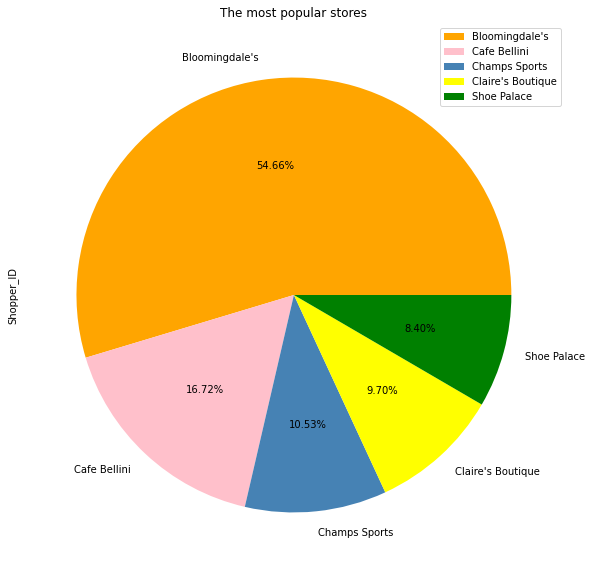

In [ ]:
#גרפים מצגת סוף סמסטר א 
most_popluar_stores_floor.groupby(['Store_Name']).sum().plot(kind='pie', y='Shopper_ID', autopct = '%1.2f%%' ,figsize=(15, 10),
                                colors = ['orange', 'pink', 'steelblue', 'yellow', 'green'],
                                title='The most popular stores')

In [ ]:
#גרפים מצגת סוף סמסטר א 
new_data.pivot_table(new_data, index=['floor'],columns='Shopper_ID',aggfunc='count')

Store_Name                                                 \
Shopper_ID  Shopper_1 Shopper_10 Shopper_100 Shopper_101 Shopper_102   
floor                                                                  
0                55.0       25.0        66.0        36.0         4.0   
1                36.0       35.0        37.0        36.0        10.0   
2                23.0        7.0        16.0        28.0        13.0   
3                30.0        NaN         NaN        21.0         5.0   
4                 9.0       75.0        13.0         NaN       100.0   

                                                                        ...  \
Shopper_ID Shopper_103 Shopper_104 Shopper_105 Shopper_106 Shopper_107  ...   
floor                                                                   ...   
0                  7.0        55.0        53.0        47.0        61.0  ...   
1                 27.0        28.0        27.0        38.0        25.0  ...   
2                 33.0        10.0        18.0         6.0        32.0  ...   
3                 17.0         5.0        16.0        34.0        23.0  ...   
4                 36.0         4.0         3.0         NaN        18.0  ...   

                    y                                                         \
Shopper_ID Shopper_90 Shopper_91 Shopper_92 Shopper_93 Shopper_94 Shopper_95   
floor                                                                          
0                39.0       62.0       59.0        9.0       29.0       18.0   
1                55.0       27.0       15.0       10.0       37.0       76.0   
2                28.0       31.0       23.0       15.0       35.0       26.0   
3                 3.0       11.0       32.0       20.0       20.0       16.0   
4                 6.0        7.0       11.0       51.0        7.0        5.0   

                                                        
Shopper_ID Shopper_96 Shopper_97 Shopper_98 Shopper_99  
floor                                                   
0                28.0       45.0       64.0       47.0  
1                28.0       22.0       43.0       25.0  
2                26.0       47.0       42.0       25.0  
3                25.0       12.0       19.0        6.0  
4                20.0       12.0        NaN       22.0  

[5 rows x 3969 columns]

In [ ]:
#גרפים מצגת סוף סמסטר א 
new_data.pivot_table(new_data, index=['floor'],columns='Shopper_ID',aggfunc='count')

Store_Name                                                 \
Shopper_ID  Shopper_1 Shopper_10 Shopper_100 Shopper_101 Shopper_102   
floor                                                                  
0                55.0       25.0        66.0        36.0         4.0   
1                36.0       35.0        37.0        36.0        10.0   
2                23.0        7.0        16.0        28.0        13.0   
3                30.0        NaN         NaN        21.0         5.0   
4                 9.0       75.0        13.0         NaN       100.0   

                                                                        ...  \
Shopper_ID Shopper_103 Shopper_104 Shopper_105 Shopper_106 Shopper_107  ...   
floor                                                                   ...   
0                  7.0        55.0        53.0        47.0        61.0  ...   
1                 27.0        28.0        27.0        38.0        25.0  ...   
2                 33.0        10.0        18.0         6.0        32.0  ...   
3                 17.0         5.0        16.0        34.0        23.0  ...   
4                 36.0         4.0         3.0         NaN        18.0  ...   

                    y                                                         \
Shopper_ID Shopper_90 Shopper_91 Shopper_92 Shopper_93 Shopper_94 Shopper_95   
floor                                                                          
0                39.0       62.0       59.0        9.0       29.0       18.0   
1                55.0       27.0       15.0       10.0       37.0       76.0   
2                28.0       31.0       23.0       15.0       35.0       26.0   
3                 3.0       11.0       32.0       20.0       20.0       16.0   
4                 6.0        7.0       11.0       51.0        7.0        5.0   

                                                        
Shopper_ID Shopper_96 Shopper_97 Shopper_98 Shopper_99  
floor                                                   
0                28.0       45.0       64.0       47.0  
1                28.0       22.0       43.0       25.0  
2                26.0       47.0       42.0       25.0  
3                25.0       12.0       19.0        6.0  
4                20.0       12.0        NaN       22.0  

[5 rows x 3969 columns]

In [ ]:
#גרפים מצגת סוף סמסטר א 
new_data.pivot_table(new_data, index=['floor','Store_Name'],aggfunc='count')

Shopper_ID  Unnamed: 0   lat   lng  \
floor Store_Name                                                            
0     Abercrombie & Fitch                       3           3     3     3   
      Ajisen Ramen                             17          17    17    17   
      Amoura Cafe Fresh Mediterranean         315         315   315   315   
      Andale Mexican Restaurant                 1           1     1     1   
      Beard Papa's Cream Puffs                 40          40    40    40   
...                                           ...         ...   ...   ...   
4     Century San Francisco Centre 9            2           2     2     2   
      M.Y. China                             1412        1412  1412  1412   
      Nordstrom                               267         267   267   267   
      Optica                                  761         761   761   761   
      TAP 415                                2892        2892  2892  2892   

                                       seenTimestamp     x     y  
floor Store_Name                                                  
0     Abercrombie & Fitch                          3     3     3  
      Ajisen Ramen                                17    17    17  
      Amoura Cafe Fresh Mediterranean            315   315   315  
      Andale Mexican Restaurant                    1     1     1  
      Beard Papa's Cream Puffs                    40    40    40  
...                                              ...   ...   ...  
4     Century San Francisco Centre 9               2     2     2  
      M.Y. China                                1412  1412  1412  
      Nordstrom                                  267   267   267  
      Optica                                     761   761   761  
      TAP 415                                   2892  2892  2892  

[152 rows x 7 columns]

In [ ]:
#גרפים מצגת סוף סמסטר א 
demographic = pd.read_csv("domografic.csv")

In [ ]:
#גרפים מצגת סוף סמסטר א 
gender = demographic.groupby(by='Gender')
print(gender)
gender_mean = gender.mean()
gender_mean

,Age,Number_of_Children_under_18_years_of_age
Gender,,
F,45.883895,0.501873
M,52.053333,0.450000


In [ ]:
#גרפים מצגת סוף סמסטר א 
#גרף עוגה המחלק את הלוקוחות לפי מגדר
fig = go.Figure()
fig.add_trace(go.Pie(labels=gender_mean.index, values=gender_mean.Age))
fig.update_layout(
    height=500,
)
fig.show()

In [ ]:
#גרפים מצגת סוף סמסטר א 
floor_df = new_data.groupby(by='floor')
floor_df.head()

,Unnamed: 0,Shopper_ID,floor,lat,lng,x,y,seenTimestamp,Store_Name
0,0,Shopper_556,4,37.661463,-122.298673,-2934.558251,-1.616972e+04,2016-11-22T02:16:06.000Z,Bloomingdale's
1,1,Shopper_556,1,37.784062,-122.406943,117.262475,1.518238e+02,2016-12-23T22:01:25.000Z,Sunglass Hut
2,2,Shopper_556,4,37.784361,-122.406710,156.125087,1.713572e+02,2016-11-22T01:42:28.000Z,TAP 415
3,3,Shopper_360,0,37.784341,-122.406891,134.499673,1.676744e+02,2016-10-13T18:27:38.000Z,Marbles: The Brain Store
4,4,Shopper_360,2,37.784017,-122.407307,94.981693,1.722692e+02,2016-10-12T21:36:18.000Z,Forever Flawless
5,5,Shopper_420,4,37.661624,-122.298459,-2908.686633,-1.617058e+04,2016-12-19T01:31:08.000Z,Bloomingdale's
6,6,Shopper_420,1,37.783856,-122.407092,91.860575,1.446519e+02,2016-12-19T01:36:10.000Z,Nordstrom E-Bar
7,7,Shopper_245,2,37.783970,-122.407194,98.389647,1.615519e+02,2016-10-14T03:02:55.000Z,Forever Flawless
8,8,Shopper_334,2,37.783828,-122.406986,100.307150,1.374774e+02,2017-03-18T03:25:59.000Z,Dyson
9,9,Shopper_205,1,37.784219,-122.406896,132.417939,1.613389e+02,2017-06-06T20:33:31.000Z,Swatch


In [ ]:
#גרפים מצגת סוף סמסטר א 
num_of_customers_in_each_floor = new_data.floor.value_counts()
num_of_customers_in_each_floor

0    29217
1    17985
2    14043
4    11819
3     7859
Name: floor, dtype: int64

In [ ]:
#גרפים מצגת סוף סמסטר א 
percentage = [str(round(i/num_of_customers_in_each_floor.sum(),2)*100)+'%' for i in num_of_customers_in_each_floor ]
percentage

['36.0%', '22.0%', '17.0%', '15.0%', '10.0%']

In [ ]:
#גרפים מצגת סוף סמסטר א 
# אחוז הלקוחות שרכשו בכל קומה
# מספר ביקורים בכל חנות = קנייה
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['0', '1', '2', '3', '4'],
    y=num_of_customers_in_each_floor,
    marker_color=['blue','orange', 'yellow','pink', 'red'],
    text=percentage,
    textposition='outside',
))
fig.update_layout(
    title='Number Of Customer On Each Floor', 
    yaxis_title='Number Of Cases',
    xaxis_title='Floor Index'
    )
fig.show()




In [ ]:
#גרפים מצגת סוף סמסטר א 
num_of_stores_in_each_floor = shops_data.Floor_Index.value_counts()
num_of_stores_in_each_floor


0    48
1    37
2    34
3    33
4     8
5     3
6     1
7     1
8     1
Name: Floor_Index, dtype: int64

In [ ]:
#גרפים מצגת סוף סמסטר א 
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['0', '1', '2', '3', '4'],
    y=num_of_stores_in_each_floor,
    marker_color=['blue','orange', 'yellow','pink', 'red'],
    text=num_of_stores_in_each_floor,
    textposition='outside',
))
fig.update_layout(
    title='Number Of Stores On Each Floor', 
    yaxis_title='Number Of Cases',
    xaxis_title='Floor Index'
    )
fig.show()


# מספר חנויות בכל קומה

In [ ]:
#גרפים מצגת סוף סמסטר א 

most_popluar_stores = new_data.groupby(['Store_Name']).count()
most_popluar_stores.head(10)

,Unnamed: 0,Shopper_ID,floor,lat,lng,x,y,seenTimestamp
Store_Name,,,,,,,,
49ers Team Store,2,2,2,2,2,2,2,2
Abercrombie & Fitch,121,121,121,121,121,121,121,121
Adidas,41,41,41,41,41,41,41,41
Ajisen Ramen,17,17,17,17,17,17,17,17
Aldo,231,231,231,231,231,231,231,231
Amazon Pop-Up,88,88,88,88,88,88,88,88
American Eagle Outfitters,540,540,540,540,540,540,540,540
Amiri Salon,250,250,250,250,250,250,250,250
Amoura Cafe Fresh Mediterranean,315,315,315,315,315,315,315,315


In [ ]:
#גרפים מצגת סוף סמסטר א 
most_popluar_stores_sorted = most_popluar_stores.sort_values(by = ['Shopper_ID'], ascending= False)

most_popluar_stores_sorted.reset_index(inplace= True)
most_popluar_stores_sorted = most_popluar_stores_sorted.head()
most_popluar_stores_sorted

,Store_Name,Unnamed: 0,Shopper_ID,floor,lat,lng,x,y,seenTimestamp
0,Bloomingdale's,32138,32138,32138,32138,32138,32138,32138,32138
1,Kiehl's,5965,5965,5965,5965,5965,5965,5965,5965
2,Cafe Bellini,3478,3478,3478,3478,3478,3478,3478,3478
3,TAP 415,2894,2894,2894,2894,2894,2894,2894,2894
4,Forever Flawless,2626,2626,2626,2626,2626,2626,2626,2626


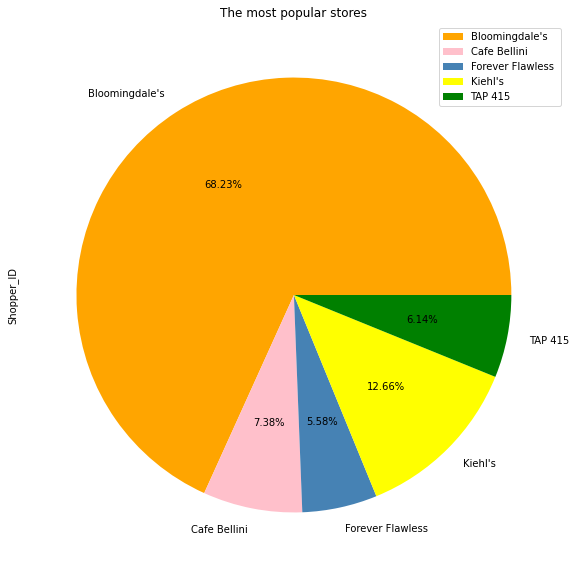

In [ ]:
#גרפים מצגת סוף סמסטר א 
#חמשת החנויות הכי פופלריות
most_popluar_stores_sorted.groupby(['Store_Name']).sum().plot(kind='pie', y='Shopper_ID', autopct = '%1.2f%%' ,figsize=(15, 10),
                                colors = ['orange', 'pink', 'steelblue', 'yellow', 'green'],
                                title='The most popular stores')


In [ ]:
#גרפים מצגת סוף סמסטר א 
fig = go.Figure()
fig.add_trace(go.Bar(name='bb', x=[''], y=most_popluar_stores_sorted.index, marker_color='lightsalmon'))
fig.update_layout(
    barmode='group',
    title='Frequecy of Member and Normal of different Rating categories', 
    yaxis_title='Number of cases')
fig.show()


In [ ]:
#גרפים מצגת סוף סמסטר א 
shopping_data = pd.read_csv("shopping_data.csv")

In [ ]:
#גרפים מצגת סוף סמסטר א 
shopping_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#גרפים מצגת סוף סמסטר א 
bb = shopping_data.groupby(['Age']).count()
bb.reset_index(inplace= True)
bb



,Age,CustomerID,Genre,Annual Income (k$),Spending Score (1-100)
0,18,4,4,4,4
1,19,8,8,8,8
2,20,5,5,5,5
3,21,5,5,5,5
4,22,3,3,3,3
5,23,6,6,6,6
6,24,4,4,4,4
7,25,3,3,3,3
8,26,2,2,2,2
9,27,6,6,6,6


In [ ]:
#גרפים מצגת סוף סמסטר א 
fig = px.scatter(x=bb.Age, y= bb.CustomerID, trendline='ols') #ordinary least squares (OLS)
fig.update_layout(width=800)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
#גרפים מצגת סוף סמסטר א 
fig = px.scatter(data_frame=bb, x='Age' , y='CustomerID')#, color="Country_Region")#,size='Case_Fatality_Ratio') #, hover_data=['Province_State'])
fig.show()

In [ ]:
#גרפים מצגת סוף סמסטר א 
#גרף שמראה את אחוז הרכישות מתוך המשכורת לפי גיל
fig = px.scatter(data_frame=shopping_data, x='Age' , y='Spending Score (1-100)')#, color="Country_Region",size='Case_Fatality_Ratio' , hover_data=['Province_State'])
fig.show()

In [ ]:
category_mapping = pd.read_csv("category_mapping.csv")

In [ ]:
category_mapping.head(50)

,Store_Name,Broad_Category,Fine_Category
0,Amazon Pop-Up,Retail,Misc.
1,Bespoke Events,Retail,Misc.
2,Bespoke Coworking,Retail,Specialty Store
3,Dyson,Retail,Misc.
4,Penhaligon�۪s,Retail,Misc.
5,SF Sports,Retail,Apparel And Accessories
6,Claire's Boutique,Retail,Apparel And Accessories
7,Go! Toys and Games,Retail,Toy Stores
8,Nordstrom,Retail,Department Stores
9,Bloomingdale's,Retail,Department Stores


In [ ]:
#גרפים מצגת סוף סמסטר א 
corr_df = category_mapping.corr()
corr_df




""


In [ ]:
#גרפים מצגת סוף סמסטר א 
# יצירת מפת חום- קורלציה בין קטגוריות של חנויות
fig = go.Figure(go.Histogram2d(
        x=category_mapping.Fine_Category,
        y=category_mapping.Fine_Category
    ))
fig.update_layout(
    width=600
    
)
fig.show()

In [ ]:
#גרפים מצגת סוף סמסטר א 
#קורלציה בין סוג החנות לגיל הלקוח.
fig = go.Figure(go.Histogram2d(
        x=demographic.Age,
        y=category_mapping.Fine_Category,
      
    ))
fig.update_layout(
    width=1200
)
fig.show()


In [ ]:
#גרפים מצגת סוף סמסטר א 
female = demographic.loc[demographic.Gender =='F', 'Age']
male = demographic.loc[demographic.Gender=='M', 'Age']


In [ ]:
#גרפים מצגת סוף סמסטר א 
plot1 = plt.figure(1)


<Figure size 432x288 with 0 Axes>

In [ ]:
#גרפים מצגת סוף סמסטר א 
plot2 = plt.figure(2)


<Figure size 432x288 with 0 Axes>

In [ ]:
#גרפים מצגת סוף סמסטר א 
plt.show()

(0.0, 60.0)

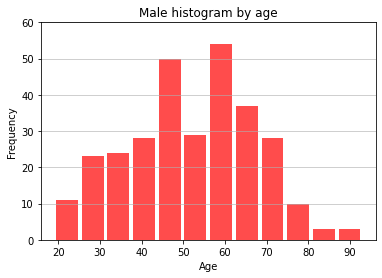

In [ ]:
#גרפים מצגת סוף סמסטר א 
#הסטוגרמה המראה התפלגות של לקוחות ממין זכר
n, bins, patches=plt.hist(x=male, bins='auto', color='red',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Male histogram by age')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 50.0)

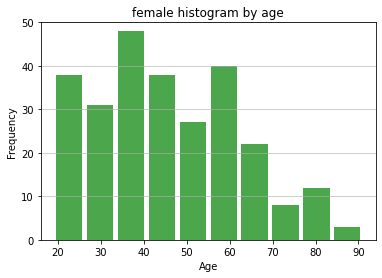

In [ ]:
#גרפים מצגת סוף סמסטר א 
#הסטוגרמה המראה התפלגות של לקוחות ממין נקבה
n, bins, patches=plt.hist(x=female, bins='auto', color='green',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('female histogram by age')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
#גרפים מצגת סוף סמסטר א 
# גרף המראה התפלגות לקוחות לפי מגדר
fig = go.Figure()
fig.add_trace(go.Pie(labels=gender_mean.index, values=gender_mean.Age))
fig.update_layout(
    height=500,
)
fig.show()


In [ ]:
FreqTable=category_mapping.Fine_Category.value_counts().to_frame()
start_row = 4

In [ ]:
FreqTable.iloc[start_row] = FreqTable.iloc[start_row:].sum()
FreqTable = FreqTable.iloc[:start_row+1]
dict = category_mapping.Fine_Category# {'Number':[49,36,17,15,9,28], 'index':['Apparel And Accessories', 'Qsr Restaurants', 'Furniture And Decor', 'Misc.','Shoe Stores' ,'Other']}
FreqTable = pd.DataFrame(dict)

In [ ]:
#  Unnamed מהדאטא פריים מחיקת העמודה  
new_data.drop('Unnamed: 0', axis = 1, inplace = True)
new_data.head()

,Shopper_ID,floor,lat,lng,x,y,seenTimestamp,Store_Name
0,Shopper_556,4,37.661463,-122.298673,-2934.558251,-16169.722290,2016-11-22T02:16:06.000Z,Bloomingdale's
1,Shopper_556,1,37.784062,-122.406943,117.262475,151.823812,2016-12-23T22:01:25.000Z,Sunglass Hut
2,Shopper_556,4,37.784361,-122.406710,156.125087,171.357200,2016-11-22T01:42:28.000Z,TAP 415
3,Shopper_360,0,37.784341,-122.406891,134.499673,167.674401,2016-10-13T18:27:38.000Z,Marbles: The Brain Store
4,Shopper_360,2,37.784017,-122.407307,94.981693,172.269243,2016-10-12T21:36:18.000Z,Forever Flawless


In [ ]:
update_data = pd.read_csv("project_mall1.csv")
update_data.head()



,Unnamed: 0,Shopper_ID,floor,lat,lng,x,y,seenTimestamp,predicted_shop
0,31,Shopper_22,0,33.061136,-107.106183,590746.264800,-1.316157e+06,2016-11-16T00:13:43.000Z,Bloomingdale's
1,33,Shopper_135,4,37.784392,-122.406765,155.116085,1.772584e+02,2017-02-08T21:50:06.000Z,TAP 415
2,34,Shopper_135,4,37.784276,-122.406775,145.341019,1.688902e+02,2017-04-05T22:16:33.000Z,TAP 415
3,56,Shopper_325,3,37.783821,-122.407142,92.236174,1.450467e+02,2016-11-23T22:18:19.000Z,iPlay n Talk
4,108,Shopper_208,1,37.784073,-122.407014,113.674125,1.570978e+02,2017-03-23T22:57:51.000Z,Kiehl's


In [ ]:

category = pd.read_csv("category_mapping_new.csv")
category.head()

,Store_Name,Fine_Category
0,Claire's Boutique,Apparel And Accessories
1,Bloomingdale's,Department Stores
2,OAK+FORT,Apparel And Accessories
3,Champs Sports,Sports Stores
4,iPlay n Talk,Electronics Stores


In [ ]:
#neo4j

In [ ]:
#  domografic_new יצירת דאטא פריים לגליון 
domo_customer = pd.read_csv("domografic_new.csv")
domo_customer.head()

,Shopper_Id,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age
0,Shopper_22,8a3fed0d-2b89-3c23-81b3-e574d09cff1c,63,M,M,N,0
1,Shopper_48,1f22229c-25a8-3853-9c97-c74d67e80ab8,41,M,S,N,0
2,Shopper_50,26e72d7b-73db-3fe1-91ec-6ad73cd93bde,26,F,M,N,1
3,Shopper_59,99262ae5-1ee7-37ba-a8fb-916737769f5a,66,M,S,Y,0
4,Shopper_71,16f366b7-7ff1-3bad-95a0-c1bd47e2473e,68,F,M,Y,0


In [ ]:
### לבדוק אם צריך את השורת קוד של ספריית ה- replace
from dataclasses import replace

# שמירת כל עמודה בדאטא פריים בשם ייחודי, מתוך דאטא פריים domo_customer
shopper2 = domo_customer.Shopper_Id
age = domo_customer.Age
gender= domo_customer.Gender
marital_Status= domo_customer.Marital_Status
owns_home= domo_customer.Owns_Home
Num_Of_Child_Under_18= domo_customer.Number_of_Children_under_18_years_of_age

In [ ]:
# לולאה שעוברת על הקובץ אקסל ויוצרת שרשור טקסט אותו אנחנו מריצים ב neo4j
# יצירת לולאה שעוברת על העמודות הרלוונטיות מתוך דאטא פריים- domo_customer, ויצירת הלקוחות
for i in range(len(domo_customer)):
    
  print( "Create (:Shopper {Shopper_Id: '" +  shopper2[i] + "' , Age: '" + str(age[i]) + 
        "', Gender:'" +gender[i]+ "' ,Marital_Status: '" + marital_Status[i]+"' ,Owns_Home: '"
         + owns_home[i]+"' ,Num_Of_Child_Under_18: '" +  str(Num_Of_Child_Under_18[i])+"' })")

Create (:Shopper {Shopper_Id: 'Shopper_22' , Age: '63', Gender:'M' ,Marital_Status: 'M' ,Owns_Home: 'N' ,Num_Of_Child_Under_18: '0' })
Create (:Shopper {Shopper_Id: 'Shopper_48' , Age: '41', Gender:'M' ,Marital_Status: 'S' ,Owns_Home: 'N' ,Num_Of_Child_Under_18: '0' })
Create (:Shopper {Shopper_Id: 'Shopper_50' , Age: '26', Gender:'F' ,Marital_Status: 'M' ,Owns_Home: 'N' ,Num_Of_Child_Under_18: '1' })
Create (:Shopper {Shopper_Id: 'Shopper_59' , Age: '66', Gender:'M' ,Marital_Status: 'S' ,Owns_Home: 'Y' ,Num_Of_Child_Under_18: '0' })
Create (:Shopper {Shopper_Id: 'Shopper_71' , Age: '68', Gender:'F' ,Marital_Status: 'M' ,Owns_Home: 'Y' ,Num_Of_Child_Under_18: '0' })
Create (:Shopper {Shopper_Id: 'Shopper_76' , Age: '73', Gender:'F' ,Marital_Status: 'M' ,Owns_Home: 'Y' ,Num_Of_Child_Under_18: '0' })
Create (:Shopper {Shopper_Id: 'Shopper_114' , Age: '38', Gender:'M' ,Marital_Status: 'M' ,Owns_Home: 'Y' ,Num_Of_Child_Under_18: '0' })
Create (:Shopper {Shopper_Id: 'Shopper_120' , Age: '82

In [ ]:
# יצירת דאטא פריים לכל עמודה רלוונטית בקובץ update_data
shopper1 = update_data.Shopper_ID
shop1 = update_data.predicted_shop
shopping_time = update_data.seenTimestamp

# לולאה שעוברת על הקובץ אקסל ויוצרת שרשור טקסט אותו אנחנו מריצים ב neo4j
# יצירת קשת המקשרת בין חנות לקטגוריה
for i in range(1000):
    print( 'match(c:Shopper {Shopper_Id: "' +  shopper1[i] + '" }),(s:Shop {name:"'  + shop1[i] +
          '"}) create(c)-[:shop_in {seen_time: "'+ shopping_time[i] + '" }]->(s);')

In [ ]:
# יצירת דאטא פריים לכל עמודה רלוונטית בקובץ category
shop1 = category.Store_Name
Fine_Category = category.Fine_Category

# לולאה שעוברת על הקובץ אקסל ויוצרת שרשור טקסט אותו אנחנו מריצים ב neo4j
# יצירת קשת המקשרת בין חנות לקטגוריה
for i in range(10):
    print( 'match(a:Category {Fine_Category: "' +  Fine_Category[i] + '" }),(s:Shop {name:"'  + shop1[i] +'"}) create(s)-[:belongs_to]->(a);')

match(a:Category {Fine_Category: "Apparel And Accessories" }),(s:Shop {name:"Claire's Boutique"}) create(s)-[:belongs_to]->(a);
match(a:Category {Fine_Category: "Department Stores" }),(s:Shop {name:"Bloomingdale's"}) create(s)-[:belongs_to]->(a);
match(a:Category {Fine_Category: "Apparel And Accessories" }),(s:Shop {name:"OAK+FORT"}) create(s)-[:belongs_to]->(a);
match(a:Category {Fine_Category: "Sports Stores" }),(s:Shop {name:"Champs Sports"}) create(s)-[:belongs_to]->(a);
match(a:Category {Fine_Category: "Electronics Stores" }),(s:Shop {name:"iPlay n Talk"}) create(s)-[:belongs_to]->(a);
match(a:Category {Fine_Category: "Shoe Stores" }),(s:Shop {name:"Shoe Palace "}) create(s)-[:belongs_to]->(a);
match(a:Category {Fine_Category: "Qsr Restaurants" }),(s:Shop {name:"Cafe Bellini"}) create(s)-[:belongs_to]->(a);
match(a:Category {Fine_Category: "Qsr Restaurants" }),(s:Shop {name:"TAP 415"}) create(s)-[:belongs_to]->(a);
match(a:Category {Fine_Category: "Furniture And Decor" }),(s:Shop 

In [ ]:
print(update_data.seenTimestamp)

0       2016-11-16T00:13:43.000Z
1       2017-02-08T21:50:06.000Z
2       2017-04-05T22:16:33.000Z
3       2016-11-23T22:18:19.000Z
4       2017-03-23T22:57:51.000Z
                  ...           
4584    2016-10-14T01:27:34.000Z
4585    2017-04-07T20:47:03.000Z
4586    2016-10-03T21:08:32.000Z
4587    2016-10-25T02:20:21.000Z
4588    2016-11-06T02:22:35.000Z
Name: seenTimestamp, Length: 4589, dtype: object


,Shopper_Id,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age
0,Shopper_22,8a3fed0d-2b89-3c23-81b3-e574d09cff1c,63,M,M,N,0
1,Shopper_48,1f22229c-25a8-3853-9c97-c74d67e80ab8,41,M,S,N,0
2,Shopper_50,26e72d7b-73db-3fe1-91ec-6ad73cd93bde,26,F,M,N,1
3,Shopper_59,99262ae5-1ee7-37ba-a8fb-916737769f5a,66,M,S,Y,0
4,Shopper_71,16f366b7-7ff1-3bad-95a0-c1bd47e2473e,68,F,M,Y,0


In [ ]:
#קלסטרינג בפייתון-ניסיון, לא השתמשנו בסוף כי החלטנו ללכת עם הדאטא בייס גרפי
new_data.head()

,Shopper_ID,floor,lat,lng,x,y,seenTimestamp,Store_Name
0,Shopper_556,4,37.661463,-122.298673,-2934.558251,-16169.722290,2016-11-22T02:16:06.000Z,Bloomingdale's
1,Shopper_556,1,37.784062,-122.406943,117.262475,151.823812,2016-12-23T22:01:25.000Z,Sunglass Hut
2,Shopper_556,4,37.784361,-122.406710,156.125087,171.357200,2016-11-22T01:42:28.000Z,TAP 415
3,Shopper_360,0,37.784341,-122.406891,134.499673,167.674401,2016-10-13T18:27:38.000Z,Marbles: The Brain Store
4,Shopper_360,2,37.784017,-122.407307,94.981693,172.269243,2016-10-12T21:36:18.000Z,Forever Flawless


# New Section

In [ ]:
new_data.isna().sum()

Shopper_ID       0
floor            0
lat              0
lng              0
x                0
y                0
seenTimestamp    0
Store_Name       0
dtype: int64

In [ ]:
new_data.describe()

,floor,lat,lng,x,y
count,80923.000000,80923.000000,80923.000000,8.092300e+04,8.092300e+04
mean,1.444880,36.908258,-119.594534,1.073051e+05,-2.427400e+05
std,1.428156,2.075874,6.720800,2.576252e+05,5.790479e+05
min,0.000000,0.000000,-122.413748,-8.259860e+03,-1.050000e+07
25%,0.000000,37.661314,-122.407121,9.357097e+01,-2.209046e+04
50%,1.000000,37.783966,-122.406765,1.103075e+02,1.534715e+02
75%,2.000000,37.784105,-122.219992,5.705456e+03,1.614382e+02
max,4.000000,37.787370,0.000000,4.725223e+06,8.299022e+02


In [ ]:
new_data.Store_Name.unique()

array(["Bloomingdale's", 'Sunglass Hut', 'TAP 415',
       'Marbles: The Brain Store', 'Forever Flawless ', 'Nordstrom E-Bar',
       'Dyson', 'Swatch', 'Amoura Cafe Fresh Mediterranean',
       'Haagen Dazs', "Claire's Boutique", 'OAK+FORT', 'iPlay n Talk',
       'Currency Exchange International ', 'The Walking Company',
       'Optica', "Kiehl's", 'Coach', 'Brookstone', "Victoria's Secret",
       'Yoppi Frozen Yogurt ', 'Champs Sports', 'Shoe Palace ',
       'ProActiv Solutions ', 'Aldo', 'Cafe Bellini', 'bebe',
       'Kate Spade New York', 'Tumi', 'Cako Bakery', 'LEGO',
       'RED Valentino', 'GNC', "Wetzel's Pretzels", 'Fossil', 'Superdry ',
       'Warriors Team Store', 'American Eagle Outfitters',
       'Club Monaco Men', 'Starbucks', 'M.Y. China',
       "L'Occitane en Provence", 'lululemon athletica',
       'San Francisco Soup Company', 'NYS Collection', 'Shoe Wiz',
       'Amiri Salon', 'Bose', 'Pandora', 'Jamba Juice', 'Swarovski',
       'Razer', 'Janie And Jack', 'Su

In [ ]:
corr_df = new_data.corr()
corr_df

,floor,lat,lng,x,y
floor,1.000000,0.000029,-0.001595,-0.007599,0.000189
lat,0.000029,1.000000,-0.999964,-0.999770,0.999978
lng,-0.001595,-0.999964,1.000000,0.999862,-0.999992
x,-0.007599,-0.999770,0.999862,1.000000,-0.999792
y,0.000189,0.999978,-0.999992,-0.999792,1.000000


In [ ]:
# מפת חום בין פיצרים מטבלת new_data
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=corr_df, 
    x=corr_df.columns, 
    y=corr_df.columns,
    zmax=1, 
    zmin=-1
))
fig.update_layout({
    'title':"Features Correlation Heatmap"
})

In [ ]:
cols = corr_df.columns.to_list()
for i in range(len(cols)):
  print(cols[i], ': ', end=' ')
  for j in range(len(cols)):
    if abs(corr_df.iloc[i,j]) >= 0.85 and cols[i] is not cols[j] :
      print(cols[j], end=', ')
  print()

floor :  
lat :  lng, x, y, 
lng :  lat, x, y, 
x :  lat, lng, y, 
y :  lat, lng, x, 


In [ ]:
# רגרסיה לינארית רבת משתנים
# חיזוי קטוריה על פי גיל ומין

demographic.Marital_Status.unique()
demographic.head()
# new_data['Shopper_ID'] = pd.to_numeric(new_data['Shopper_ID'],downcast= 'float',errors= 'coerce')
# new_data['seenTimestamp'] = pd.to_numeric(new_data['seenTimestamp'],downcast= 'float',errors= 'coerce')
# new_data['Store_Name'] = pd.to_numeric(new_data['Store_Name'],downcast= 'float',errors= 'coerce')
# new_data.Shopper_ID = new_data.Shopper_ID.astype(float)
# new_data.head()

,Shopper_Id,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age
0,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,F,D,N,1
1,Shopper_2,1bd5093b-5a76-3ccc-b0d2-37695a858a95,42,F,M,N,1
2,Shopper_3,d08139f8-c50d-3472-adf8-6dcc4724164c,51,F,M,N,1
3,Shopper_4,29b285af-f631-3100-9a4e-5de09df7f974,35,F,D,N,2
4,Shopper_5,63fc3248-9900-3074-b887-c6ed6d73d0e3,42,M,S,N,0


In [ ]:
demographic.rename(columns= {'Shopper_Id':'Shopper_ID'}, inplace= True)
demographic.head()

,Shopper_ID,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age
0,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,F,D,N,1
1,Shopper_2,1bd5093b-5a76-3ccc-b0d2-37695a858a95,42,F,M,N,1
2,Shopper_3,d08139f8-c50d-3472-adf8-6dcc4724164c,51,F,M,N,1
3,Shopper_4,29b285af-f631-3100-9a4e-5de09df7f974,35,F,D,N,2
4,Shopper_5,63fc3248-9900-3074-b887-c6ed6d73d0e3,42,M,S,N,0


In [ ]:
demog_with_shop = pd.merge(left = demographic, right =new_data, how = 'inner')
demog_with_shop.head(10)

,Shopper_ID,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,floor,lat,lng,x,y,seenTimestamp,Store_Name
0,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,F,D,N,1,4,35.664477,-115.588529,251861.043600,-5.920846e+05,2016-11-11T02:54:35.000Z,Bloomingdale's
1,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,F,D,N,1,1,30.227255,-97.925648,945132.938300,-2.105954e+06,2016-11-12T02:30:56.000Z,Bloomingdale's
2,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,F,D,N,1,0,34.005662,-110.166224,472621.240400,-1.052907e+06,2016-11-12T02:33:21.000Z,Bloomingdale's
3,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,F,D,N,1,3,32.386330,-104.920364,661976.904200,-1.510040e+06,2016-11-12T02:27:29.000Z,Bloomingdale's
4,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,F,D,N,1,0,32.386375,-104.920369,675117.892300,-1.504205e+06,2016-11-12T02:23:03.000Z,Bloomingdale's
5,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,F,D,N,1,3,35.664542,-115.588398,257038.557500,-5.898794e+05,2016-11-12T03:08:52.000Z,Bloomingdale's
6,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,F,D,N,1,1,31.971096,-103.575168,727050.120800,-1.619933e+06,2016-11-12T02:00:26.000Z,Bloomingdale's
7,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,F,D,N,1,2,35.776100,-115.947265,248383.769100,-5.566780e+05,2016-11-12T03:09:01.000Z,Bloomingdale's
8,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,F,D,N,1,4,37.784053,-122.407049,110.843415,1.686269e+02,2016-11-12T01:52:35.000Z,Nordstrom
9,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,F,D,N,1,0,32.386391,-104.919912,675147.806600,-1.504231e+06,2016-11-12T02:56:35.000Z,Bloomingdale's


In [ ]:
import datetime as dt
demog_with_shop.Gender.replace({'M':0, 'F':1}, inplace=True)
demog_with_shop.Marital_Status.replace({'M':0, 'D':1, 'S':1}, inplace=True)
demog_with_shop.Owns_Home.replace({'Y':0, 'N':1}, inplace=True)
demog_with_shop = demog_with_shop.astype({'seenTimestamp':'datetime'})
demog_with_shop.drop(['ID', 'lat', 'lng','x', 'y' ],  axis=1, inplace= True)
demog_with_shop.head()
demog_with_shop.info()

,Shopper_ID,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,floor,lat,lng,x,y,seenTimestamp,Store_Name
0,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,1,1,1,1,4,35.664477,-115.588529,251861.0436,-5.920846e+05,2016-11-11T02:54:35.000Z,Bloomingdale's
1,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,1,1,1,1,1,30.227255,-97.925648,945132.9383,-2.105954e+06,2016-11-12T02:30:56.000Z,Bloomingdale's
2,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,1,1,1,1,0,34.005662,-110.166224,472621.2404,-1.052907e+06,2016-11-12T02:33:21.000Z,Bloomingdale's
3,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,1,1,1,1,3,32.386330,-104.920364,661976.9042,-1.510040e+06,2016-11-12T02:27:29.000Z,Bloomingdale's
4,Shopper_1,831b9564-99d7-3b57-a9c0-3ac1f31560d5,23,1,1,1,1,0,32.386375,-104.920369,675117.8923,-1.504205e+06,2016-11-12T02:23:03.000Z,Bloomingdale's


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(demog_with_shop), columns= new_data.columns)

scaled_df.head()

In [ ]:
#KNN אלגוריתם

X = demog_with_shop.drop(['Shopper_ID','ID','seenTimestamp','Store_Name'], axis=1)
y = demog_with_shop.Store_Name
X

,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,floor,lat,lng,x,y
0,23,1,1,1,1,4,35.664477,-115.588529,251861.043600,-5.920846e+05
1,23,1,1,1,1,1,30.227255,-97.925648,945132.938300,-2.105954e+06
2,23,1,1,1,1,0,34.005662,-110.166224,472621.240400,-1.052907e+06
3,23,1,1,1,1,3,32.386330,-104.920364,661976.904200,-1.510040e+06
4,23,1,1,1,1,0,32.386375,-104.920369,675117.892300,-1.504205e+06
...,...,...,...,...,...,...,...,...,...,...
80918,48,0,0,0,0,2,31.486624,-102.005967,787620.789600,-1.754937e+06
80919,48,0,0,0,0,3,37.783989,-122.407215,100.933858,1.627887e+02
80920,48,0,0,0,0,0,37.784062,-122.407177,94.762503,1.631630e+02
80921,48,0,0,0,0,0,34.877662,-112.991058,363581.599500,-8.098862e+05


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X,y)
feat_importances_df = pd.DataFrame({'feature_importance':model.feature_importances_}, index=X.columns)
feat_importances_df.sort_values(by='feature_importance', ascending=False)

,feature_importance
y,0.433323
floor,0.207284
lng,0.154571
x,0.106766
lat,0.094512
Number_of_Children_under_18_years_of_age,0.001032
Age,0.000844
Gender,0.000682
Marital_Status,0.000500
Owns_Home,0.000486


In [ ]:
from sklearn.feature_selection import SelectKBest , chi2

chi_selector = SelectKBest(chi2, k =len(X.columns))
chi_selector.fit(X, y)

scores = pd.Series(chi_selector.scores_.tolist()) 
p_values = round(pd.Series(chi_selector.pvalues_.tolist()), 4) 
selected_df = pd.DataFrame({'univariate_score':scores, 'p_values':p_values})
selected_df.set_index(X.columns, inplace=True, drop=True)
univariate = selected_df.sort_values(by='univariate_score', ascending=False)
univariate

In [ ]:
#scale the DF
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

In [ ]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
prediction = knn.predict(X_train)

In [ ]:
y_train_pred = pd.Series(prediction, name='prediction', index=y_train.index)

train_results = pd.DataFrame(data={'prediction':y_train_pred, 'actual':y_train})
train_results

In [ ]:
len_correct_rows = len(train_results.loc[train_results.prediction==train_results.actual])
accuracy = round(len_correct_rows/len(train_results),3)
print('accuracy = ', accuracy)

from sklearn import metrics
accu = metrics.accuracy_score(y_train, y_train_pred)
accu

In [ ]:
y_pred = knn.predict(X_test)

y_test_pred = pd.Series(y_pred, name='prediction', index=y_test.index)

test_results = pd.DataFrame(data={'prediction':y_test_pred, 'actual':y_test})
test_results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

In [ ]:
disp = ConfusionMatrixDisplay(confusion, display_labels=knn.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
import numpy as np
error_rate = []
for i in range(1,200):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
trace = go.Scatter(
    x=[i for i in range(1,200)],
    y=error_rate,
    mode='markers+lines', 
)
fig = go.Figure(trace)
fig.update_layout(
    title='Error by K Value', 
    xaxis_title='k neighboors',
    yaxis_title='Error rate'
)

fig.show()

In [ ]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 27)
knn.fit(X_train, y_train)
pred_train = knn.predict(X_train)
print(metrics.accuracy_score(y_train, pred_train))

print('===========================================')

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

print(knn.score(X_train, y_train))

#KNN אלגוריתם- סיום